# 池化层

二维最大池化层和平均池化层

* 二维最大池化层指的是对输入的每一个通道分别进行最大池化操作，对每一个池进行max操作
* 二维平均池化层指的是对输入的每一个通道分别进行平均池化操作

In [1]:
from mxnet import nd
from mxnet.gluon import nn

def pool2d(X,pool_size,mode='max'):
    p_h,p_w = pool_size
    Y = nd.zeros((X.shape[0]-p_h+1,X.shape[1]-p_w+1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if mode == 'max':
                Y[i,j] = X[i:i+p_h,j:j+p_w].max()
            elif mode == 'avg':
                Y[i,j] = X[i:i+p_h,j:j+p_w].mean()
    return Y

In [2]:
X=nd.array([[0,1,2],[3,4,5],[6,7,8]])
pool2d(X,(2,2),mode='max')


[[4. 5.]
 [7. 8.]]
<NDArray 2x2 @cpu(0)>

In [3]:
pool2d(X,(2,2),mode='avg')


[[2. 3.]
 [5. 6.]]
<NDArray 2x2 @cpu(0)>

填充和边幅

In [4]:
X=nd.arange(16).reshape((1,1,4,4)) # 1个通道，4*4
X


[[[[ 0.  1.  2.  3.]
   [ 4.  5.  6.  7.]
   [ 8.  9. 10. 11.]
   [12. 13. 14. 15.]]]]
<NDArray 1x1x4x4 @cpu(0)>

In [5]:
pool2d=nn.MaxPool2D(3)
pool2d(X) # 由于输入特征图的大小是 4x4，池化窗口大小为 3x3，步幅为 3，因此池化窗口只能滑动一次


[[[[10.]]]]
<NDArray 1x1x1x1 @cpu(0)>

In [6]:
pool2d=nn.MaxPool2D(3,padding=1,strides=2)
pool2d(X)


[[[[ 5.  7.]
   [13. 15.]]]]
<NDArray 1x1x2x2 @cpu(0)>

多通道

In [7]:
X=nd.concat(X,X,dim=1)
X


[[[[ 0.  1.  2.  3.]
   [ 4.  5.  6.  7.]
   [ 8.  9. 10. 11.]
   [12. 13. 14. 15.]]

  [[ 0.  1.  2.  3.]
   [ 4.  5.  6.  7.]
   [ 8.  9. 10. 11.]
   [12. 13. 14. 15.]]]]
<NDArray 1x2x4x4 @cpu(0)>

In [8]:
pool2d=nn.MaxPool2D(3,padding=1,strides=2)
pool2d(X)


[[[[ 5.  7.]
   [13. 15.]]

  [[ 5.  7.]
   [13. 15.]]]]
<NDArray 1x2x2x2 @cpu(0)>

最大化池化层和平均池化层在作用上有什么区别

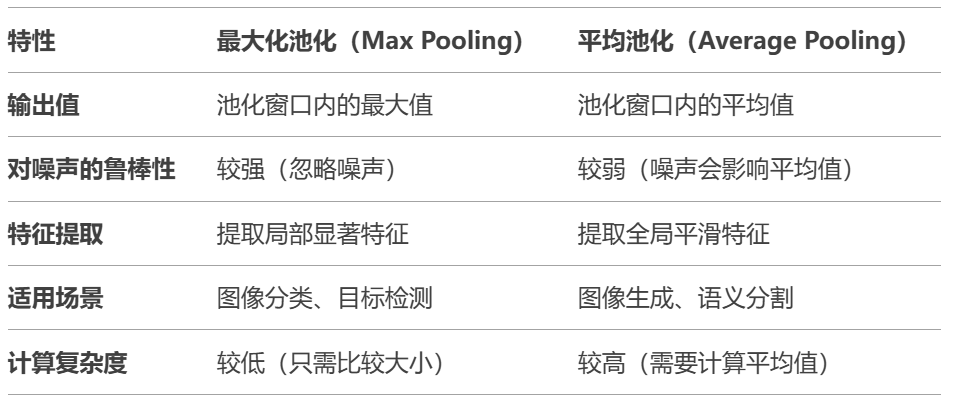

* 最大化池化：适合提取局部显著特征，对噪声鲁棒性强，常用于分类任务。

* 平均池化：适合提取全局平滑特征，对噪声敏感，常用于生成任务或分割任务。